In [553]:
import numpy as np
import pandas as pd
import seaborn as sns
import kagglehub
import os
from scipy.stats import mstats
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


PATH_TO_DATASET = os.path.join(kagglehub.dataset_download("salvatorerastelli/spotify-and-youtube"),
                               "Spotify_Youtube.csv")

# Reading the dataset
While dropping unneeded columns, similarly to the first part. Additional columns that are dropped: 'Artist'

In [554]:
df = pd.read_csv(PATH_TO_DATASET)
NUMERIC_COLUMNS = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
                   'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']
CATEGORICAL_COLUMNS = ['Album_type', 'Licensed', 'official_video']
df.drop(
    columns=['Description', 'Url_youtube', 'Url_spotify', 'Uri', 'Title', 'Channel', 'Album', 'Track', 'Unnamed: 0', 'Artist'],
    axis=1, inplace=True)
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


### Normalizing Loudness metric


In [555]:
df['Loudness']= MinMaxScaler(feature_range=(0, 1)).fit_transform(df[['Loudness']])
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,0.817861,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,0.098212,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,0.000000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,0.792712,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,0.841937,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,0.875962,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,1.000000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


### Scaling the overly spread metrics: Likes, Views, Comments and Streams
In contrast to the first part, the values will be scaled using a logarithmic scale instead of the outliers being capped, with the bottom 3% being dropped completely (songs with a dismal amount of attention).

In [556]:
display("Size before dropping outliers: ", df.shape)
thresholds = {column_name: df[column_name].quantile(0.03) for column_name in ['Views', 'Likes', 'Comments', 'Stream']}
mask = df[list(thresholds.keys())].gt(pd.Series(thresholds)).all(axis=1)
df = df[mask]
display("Size after dropping outliers: ", df.shape)

'Size before dropping outliers: '

(20718, 18)

'Size after dropping outliers: '

(18187, 18)

In [557]:
df.loc[:, 'Views'] = np.log10(df['Views'])
df.loc[:, 'Likes'] = np.log10(df['Likes'])
df.loc[:, 'Comments'] = np.log10(df['Comments'])
df.loc[:, 'Stream'] = np.log10(df['Stream'])
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,1.818600e+04,18187.000000,18187.000000,18187.000000,18187.000000
mean,0.624021,0.640492,5.308644,0.823122,0.092491,0.282504,0.049100,0.190521,0.532134,120.834939,2.260323e+05,7.139007,5.100764,3.531662,7.743577
std,0.162479,0.207076,3.575914,0.089913,0.094687,0.279682,0.180283,0.164621,0.242895,29.389313,1.240275e+05,1.030558,0.931282,0.984654,0.623354
min,0.000000,0.001250,0.000000,0.091560,0.000000,0.000002,0.000000,0.014500,0.000000,0.000000,3.500000e+04,4.260167,2.413300,0.477121,6.189394
25%,0.522000,0.517000,2.000000,0.798075,0.035500,0.043700,0.000000,0.094000,0.343000,97.028000,1.819910e+05,6.465060,4.519001,2.924796,7.319701
50%,0.640000,0.668000,5.000000,0.843665,0.050600,0.186000,0.000002,0.125000,0.538000,119.973000,2.144520e+05,7.255736,5.183307,3.609594,7.743738
75%,0.743000,0.797000,8.000000,0.876768,0.103000,0.458000,0.000342,0.232000,0.728000,139.969000,2.527330e+05,7.893353,5.760114,4.209917,8.172799
max,0.975000,1.000000,11.000000,1.000000,0.944000,0.996000,1.000000,1.000000,0.993000,243.372000,4.581483e+06,9.907393,7.705767,7.206371,9.529754


### Reducing the skew of the data

#### Goal: Skew < 2.0
Columns 'Intrumentalness', 'Loudness', 'Liveness' and 'Speechiness' have a highly skewed distribution that will affect the machine learning models.
Column describing the duration of the song has a skewness of over 24 – with approximately the top 1% amounting to all the skew.
Histograms displaying the skew below.

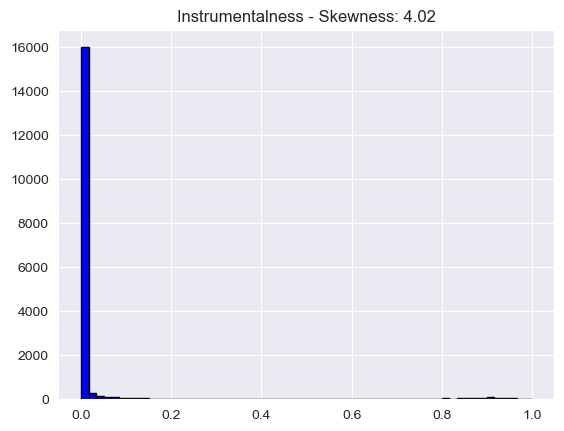

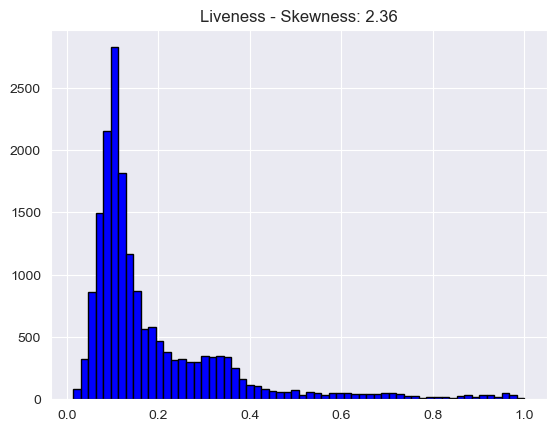

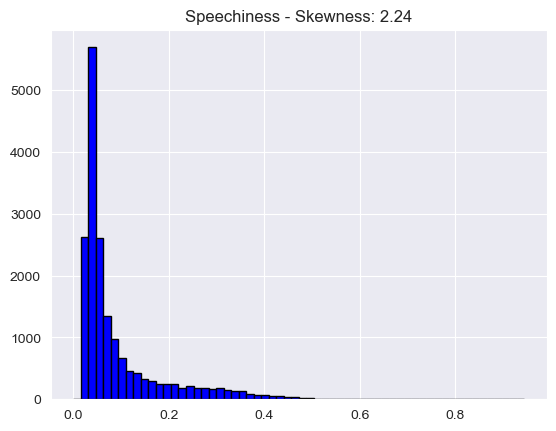

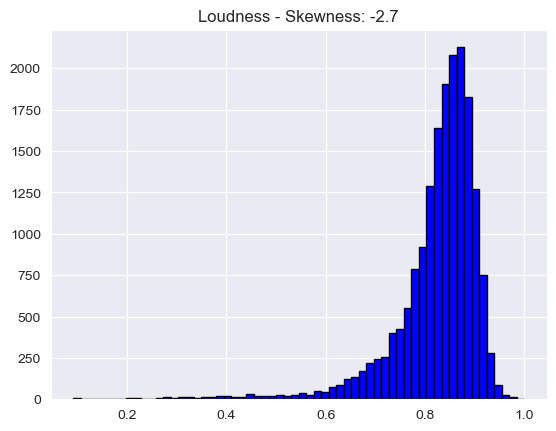

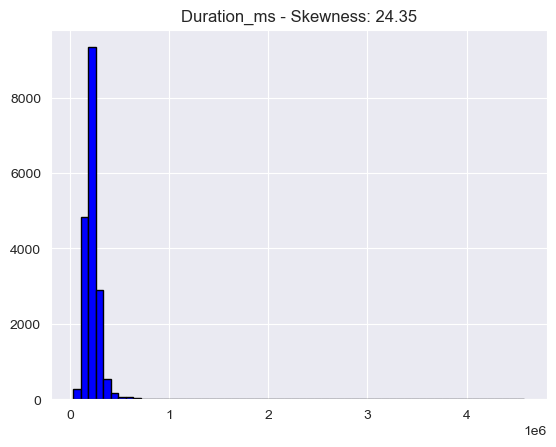

In [558]:
for column in ['Instrumentalness', 'Liveness', 'Speechiness', 'Loudness', 'Duration_ms']:
    plt.hist(df[column], bins=60, color='blue', edgecolor='black')
    plt.title(f'{column} - Skewness: {str(round(df[column].skew(), 2))}')
    plt.plot()
    plt.show()
    plt.close()

### Redefining the 'Instrumentalness' metric
The value of the metric is either extremely close to zero or, with a tiny number of songs, close to one. As such, it will be replaced with a binary variable.
- Value < 0.1 → False
- Value >= 0.1 → True


New metric name: `IsInstrumental`

In [559]:
df['IsInstrumental'] = df['Instrumentalness'].apply(lambda x: True if x >= 0.1 else False)
df.drop(columns=['Instrumentalness'], inplace=True)
NUMERIC_COLUMNS.remove('Instrumentalness')
CATEGORICAL_COLUMNS.append('IsInstrumental')
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,18186.000000,1.818600e+04,18187.000000,18187.000000,18187.000000,18187.000000
mean,0.624021,0.640492,5.308644,0.823122,0.092491,0.282504,0.190521,0.532134,120.834939,2.260323e+05,7.139007,5.100764,3.531662,7.743577
std,0.162479,0.207076,3.575914,0.089913,0.094687,0.279682,0.164621,0.242895,29.389313,1.240275e+05,1.030558,0.931282,0.984654,0.623354
min,0.000000,0.001250,0.000000,0.091560,0.000000,0.000002,0.014500,0.000000,0.000000,3.500000e+04,4.260167,2.413300,0.477121,6.189394
25%,0.522000,0.517000,2.000000,0.798075,0.035500,0.043700,0.094000,0.343000,97.028000,1.819910e+05,6.465060,4.519001,2.924796,7.319701
50%,0.640000,0.668000,5.000000,0.843665,0.050600,0.186000,0.125000,0.538000,119.973000,2.144520e+05,7.255736,5.183307,3.609594,7.743738
75%,0.743000,0.797000,8.000000,0.876768,0.103000,0.458000,0.232000,0.728000,139.969000,2.527330e+05,7.893353,5.760114,4.209917,8.172799
max,0.975000,1.000000,11.000000,1.000000,0.944000,0.996000,1.000000,0.993000,243.372000,4.581483e+06,9.907393,7.705767,7.206371,9.529754


### Reducing the right (positive) skews for 'Liveness', 'Speechiness'
Using Square Root Transformation since the data is not extremely skewed.

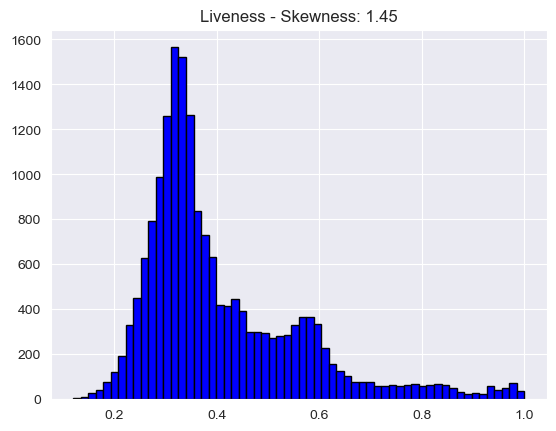

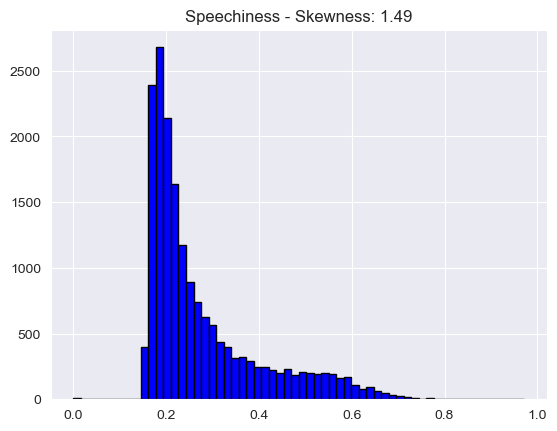

In [560]:
for column in ['Liveness', 'Speechiness']:
    df[column] = np.sqrt(df[column])
    plt.hist(df[column], bins=60, color='blue', edgecolor='black')
    plt.title(f'{column} - Skewness: {str(round(df[column].skew(), 2))}')
    plt.plot()
    plt.show()
    plt.close()

##### Capping the top outliers for duration
Value `0.987` was chosen to provide the best compromise between reducing the skew and retaining the data distribution.

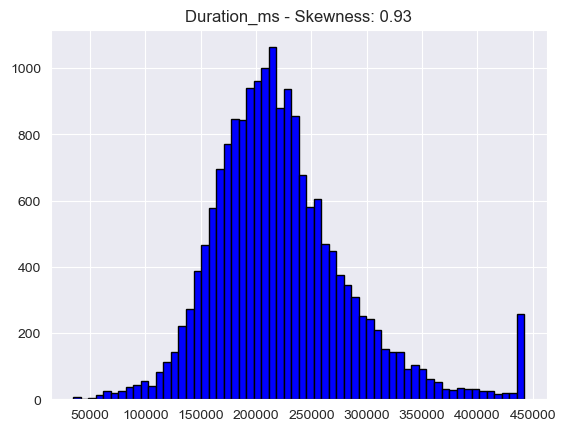

In [561]:
threshold = df['Duration_ms'].quantile(0.987)
df['Duration_ms'] = df['Duration_ms'].clip(upper=threshold)
plt.hist(df['Duration_ms'], bins=60, color='blue', edgecolor='black')
plt.title(f'Duration_ms - Skewness: {str(round(df['Duration_ms'].skew(), 2))}')
plt.plot()
plt.show()
plt.close()

### Reducing the left (negative) skews for 'Loudness'
Using lower Winsorization to limit the close to zero values. `0.013` chosen to reduce the skew under 2.0 without capping too many values.

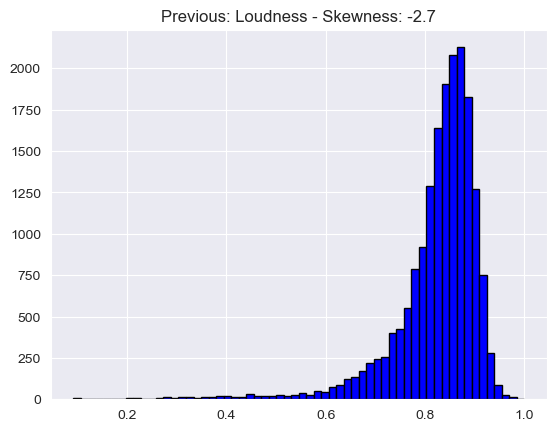

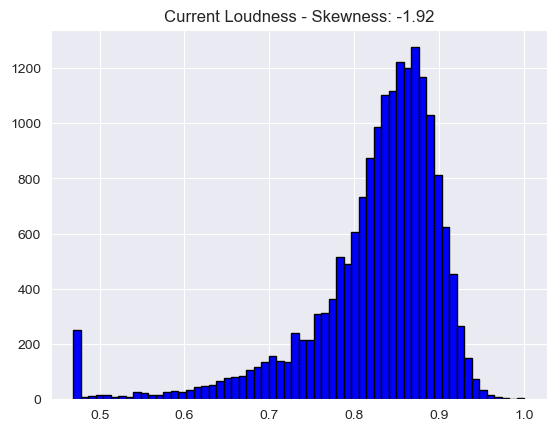

In [562]:
plt.hist(df['Loudness'], bins=60, color='blue', edgecolor='black')
plt.title(f'Previous: Loudness - Skewness: {str(round(df['Loudness'].skew(), 2))}')
plt.plot()
plt.show()
plt.close()
df['Loudness'] = df['Loudness'].clip(lower=df['Loudness'].quantile(0.013))
plt.hist(df['Loudness'], bins=60, color='blue', edgecolor='black')
plt.title(f'Current Loudness - Skewness: {str(round(df['Loudness'].skew(), 2))}')
plt.plot()
plt.show()
plt.close()



# Creating the pipelines

### Separate features and the target

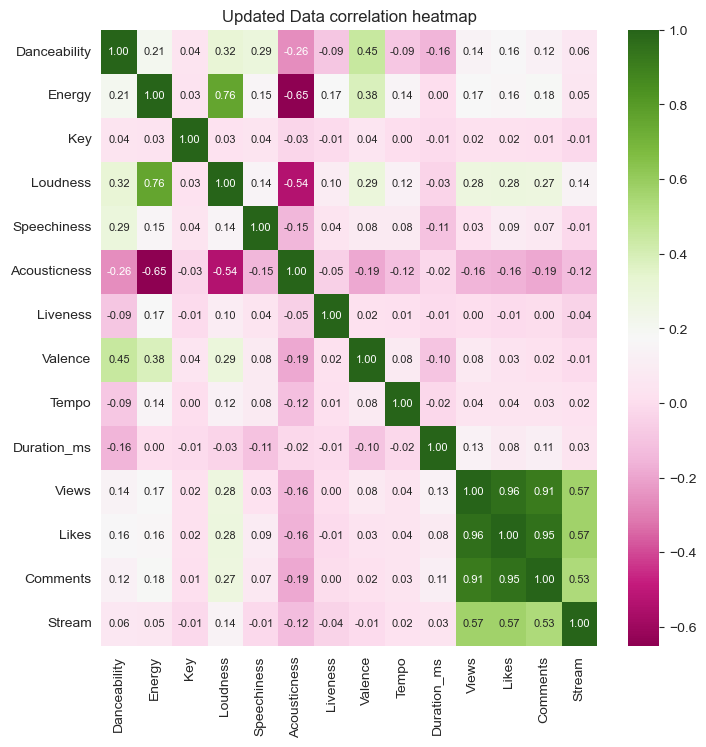

In [563]:

#target = 'YT_performance'
#X = df.drop(columns=[target], axis=1)
#y = df[target]
df.describe()

### Create preprocessing pipelines


In [564]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), #check kNN imputation
    ('scaler', StandardScaler())
])